# Customer Satisfiction Prediction  ( Classification )

In [86]:
# Import required libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations and arrays
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Static, animated, and interactive visualizations
import re  # Regular expression operations for text processing

# Machine learning libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# For saving and loading models and large data
import joblib
import pickle

# For hyperparameter optimization
from scipy.stats import uniform, randint

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

**Data Processing**

In [87]:
df = pd.read_csv("train.csv")

In [88]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [91]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [94]:
df['Departure Delay in Minutes'].fillna(df['Departure Delay in Minutes'].median(), inplace=True)

In [96]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)


In [97]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [98]:
df.drop(['Unnamed: 0','id'],axis=1, inplace=True)

In [99]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


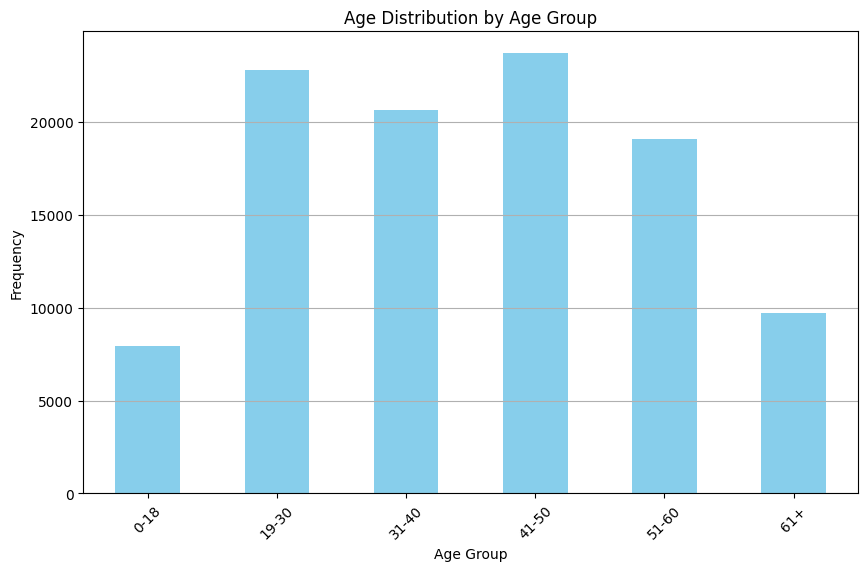

In [100]:
# Define age bins and labels
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']

# Create a new column for age groups
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count occurrences of each age group
age_group_counts = df['age_group'].value_counts().sort_index()

# Plot with Matplotlib
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


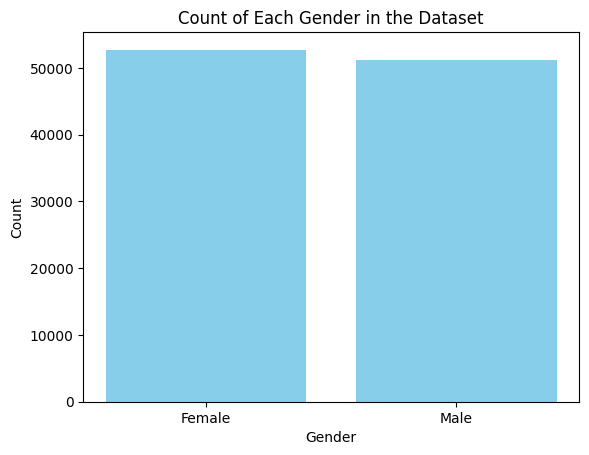

In [101]:
# Count occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create a bar plot
plt.bar(gender_counts.index, gender_counts.values, color='skyblue')

# Add labels and title for better readability
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Each Gender in the Dataset')

# Show the plot
plt.show()

**EDA**

In [102]:

#get categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

#get numerical columns
num_cols = df.select_dtypes(include=['int','float']).columns.tolist()

In [103]:
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [104]:
num_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [105]:
# List of numerical columns to drop
remove_cols = ['satisfaction']

# Drop the specified numerical columns
cat_cols = [col for col in cat_cols if col not in remove_cols]

print(cat_cols)



['Gender', 'Customer Type', 'Type of Travel', 'Class']


In [106]:
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [107]:
# Initialize the encoder
encoder = OrdinalEncoder()

# Fit and transform the data
df[cat_cols]=  encoder.fit_transform(df[cat_cols])

#print the encoded data
print(df)

# Specify the file path where you want to save the encoder
filename = 'ordinal_encoder.pkl'

# Open a file in binary write mode
with open(filename, 'wb') as f:
    # Use pickle to dump the encoder object into the file
    pickle.dump(encoder, f)

        Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0          1.0            0.0   13             1.0    2.0              460   
1          1.0            1.0   25             0.0    0.0              235   
2          0.0            0.0   26             0.0    0.0             1142   
3          0.0            0.0   25             0.0    0.0              562   
4          1.0            0.0   61             0.0    0.0              214   
...        ...            ...  ...             ...    ...              ...   
103899     0.0            1.0   23             0.0    1.0              192   
103900     1.0            0.0   49             0.0    0.0             2347   
103901     1.0            1.0   30             0.0    0.0             1995   
103902     0.0            1.0   22             0.0    1.0             1000   
103903     1.0            0.0   27             0.0    0.0             1723   

        Inflight wifi service  Departure/Arrival time convenien

In [108]:
# Define features (X) by dropping the target column
X = df.drop(['satisfaction','age_group'] ,axis=1)

# Define target (y) by selecting the target column
y = df['satisfaction']

**Train Test Split**

In [109]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Scale the data
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Models Selection**

In [111]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': uniform(0.001, 100),
            'solver': ['liblinear', 'saga']
        }
    },
    'RidgeClassifier': {
        'model': RidgeClassifier(random_state=42),
        'params': {
            'alpha': uniform(0.01, 100),
            'solver': ['auto', 'sparse_cg', 'lsqr']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 3, 5, 7, 10],
            'min_samples_split': randint(2, 11),
            'min_samples_leaf': randint(1, 5),
            'criterion': ['gini', 'entropy']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'max_depth': [None, 3, 5, 7, 10],
            'min_samples_split': randint(2, 11),
            'min_samples_leaf': randint(1, 5),
            'criterion': ['gini', 'entropy']
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'learning_rate': uniform(0.01, 1.0)
        }
    },
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'learning_rate': uniform(0.01, 0.2),
            'max_depth': randint(3, 8),
            'subsample': uniform(0.5, 0.5)
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': randint(3, 10),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
}

In [112]:
# Function to evaluate a classification model
def evaluate_model(model, params, X_train, y_train, X_test, y_test):
    # Perform randomized search
    grid_search = RandomizedSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    grid_search.fit(X_train, y_train)

    # Get the best model and predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"Model: {best_model}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy Score: {accuracy}")
    print("Classification Report:")
    print(report)
    print("=======================================")

    return best_model, accuracy




**Model Training**

In [113]:
adjusted_accuracies = {}
all_models = {}

for model_name, model_info in models.items():
    print(f"Evaluating and Training {model_name}...")
    best_model, accuracy = evaluate_model(model_info['model'], model_info['params'], X_train, y_train, X_test, y_test)
    adjusted_accuracies[model_name] = accuracy
    all_models[model_name] = best_model

    # Save the model
    with open(f"{model_name}.pkl", 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Model {model_name} saved to {model_name}.pkl")

Evaluating and Training LogisticRegression...
Model: LogisticRegression(C=70.80825777960456, max_iter=1000, random_state=42,
                   solver='saga')
Best parameters: {'C': 70.80825777960456, 'solver': 'saga'}
Accuracy Score: 0.8777248448101631
Classification Report:
{'neutral or dissatisfied': {'precision': 0.8790709208133576, 'recall': 0.9079655084094596, 'f1-score': 0.8932846163537861, 'support': 11713.0}, 'satisfied': {'precision': 0.8758493608199931, 'recall': 0.8386634318482576, 'f1-score': 0.8568531350346461, 'support': 9068.0}, 'accuracy': 0.8777248448101631, 'macro avg': {'precision': 0.8774601408166753, 'recall': 0.8733144701288587, 'f1-score': 0.8750688756942161, 'support': 20781.0}, 'weighted avg': {'precision': 0.877665160454384, 'recall': 0.8777248448101631, 'f1-score': 0.8773873701865197, 'support': 20781.0}}
Model LogisticRegression saved to LogisticRegression.pkl
Evaluating and Training RidgeClassifier...
Model: RidgeClassifier(alpha=72.20987722668248, random_

**Models Evaluation Chart**

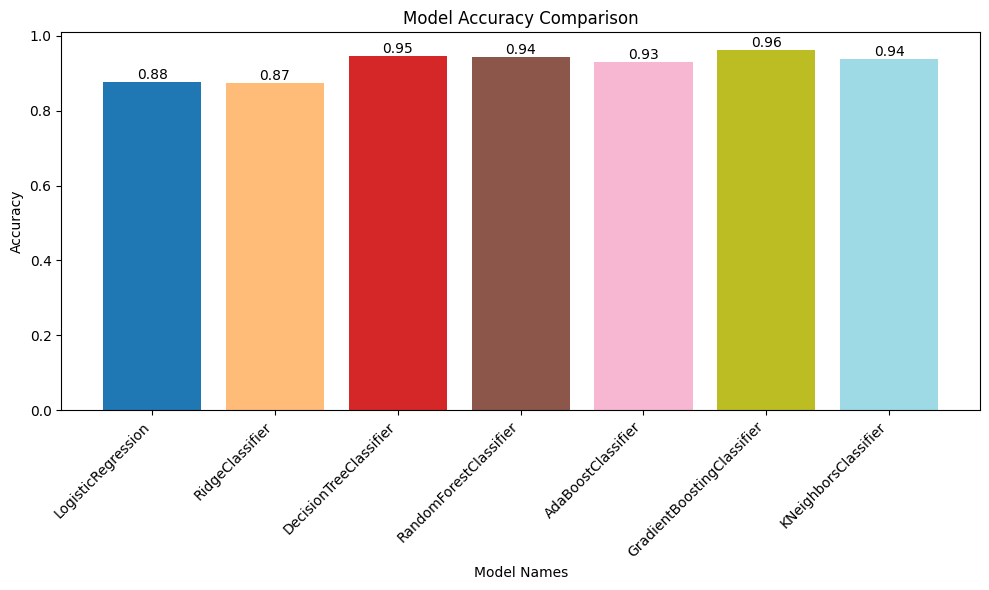

In [114]:
import matplotlib.pyplot as plt

# Sample data: Replace with actual data from adjusted_accuracies
model_names = list(adjusted_accuracies.keys())
accuracies = list(adjusted_accuracies.values())

# Generate a list of colors for each bar
colors = plt.cm.get_cmap('tab20', len(model_names))

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=[colors(i) for i in range(len(model_names))])

# Add labels and title
plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')

# Show accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.savefig('model_accuracy_comparison.png')
plt.show()
